In [1]:
from sklearn.datasets import load_wine # Importando a base
wine = load_wine() # Carrega a base de dados
wine.keys() # As chaves da base

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [2]:
X, y = wine.data, wine.target # Separa X e Y
X.shape, y.shape, set(y) # Como é um problema de classificação possui o set(y)
# X = 178 exemplos e 13 características
# y = 178 respostas, ou seja, cada exemplo tem apenas 1 resposta (X = 178 e y = 178). Pode-se concluir que não é uma base multirótulo
# set(y) = Nessa base há 3 classes (0, 1 e 2)

((178, 13), (178,), {0, 1, 2})

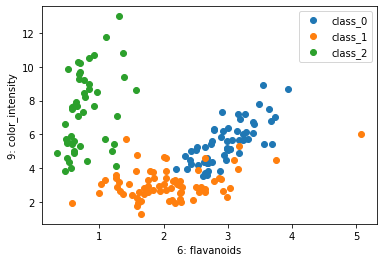

In [3]:
import matplotlib.pyplot as plt # Importando a plotagem
i,j = 6,9 #Selecionado pelo professor as características 6 e 9, de acordo com ele permitiria visualizar melhor o problema
plt.xlabel(f"{i}: {wine.feature_names[i]}") # Coloca a identificação no eixo X o nome da característica
plt.ylabel(f"{j}: {wine.feature_names[j]}") # Coloca a identificação no eixo y o nome do resultado
for k in set(y):
    plt.plot(X[:,i][y==k], X[:,j][y==k], "o", label=f"{wine.target_names[k]}")
    # X[:,i][y==k] -> Todos os exemplos do X (:) da coluna i, se o y for igual a k ([y==k])
    # X[:,j][y==k] -> Todos os exemplos do X (:) da coluna j, se o y for igual a k ([y==k])
    # "o" ->  Significa que no gráfico terá o símbolo de bolinha para todos
    # label=f"{wine.target_names[k]}" -> Significa que será configurada uma legenda com o nome de cada classe
plt.legend() # Coloca a legenda no gráfico
plt.show() # Exibe o gráfico

In [4]:
X69 = X[:, [6,9]] # Coloca numa variável todos os exemplos da coluna 6 e da coluna 9
X69.shape # Mostra a forma

(178, 2)

In [5]:
import numpy as np
class vizinho(): # Criando o classificador
    def fit(self, X, y): # Configurando a forma de treino
        self.X = X
        self.y = y
    def distancia(self, X): # Criando a função de calculo da distância
        diferenca = self.X - X # Subtrai de toda a base (self.X) o vetor que está sendo passado para a função (X)
        quadrado = diferenca ** 2 # Elevar ao quadrado
        soma = np.sum(quadrado, axis=1) # Faz a soma de todas as colunas no eixo 1
        raiz = np.sqrt(soma) # Tira a raiz quadrada (fazendo referencia ao teorema de pitágoras h^2 = a^ + b^), para descobrir a hipotenuza que é a distância
        return raiz # Retorna a raiz que é a distancia
    def predict(self, X): # Fazendo a predição
        ypred = np.empty((X.shape[0],)) # Cria o ypred vazio, já deixando a estrutura com a mesma quantidade de respostas e de exemplos
        for i in range(X.shape[0]): # Percorrer toda a base de dados
            distancias = self.distancia(X[i]) # Calculando todas as distâncias para um elemento i em na base de dados X
            vizinho = np.argmin(distancias) # Essa função argmin retorna o índice do menor e não o valor dele
            ypred[i] = self.y[vizinho]
        return ypred

In [6]:
from sklearn.metrics import accuracy_score
modelo = vizinho() # Modelo terá a mesma estrutura de vizinho
modelo.fit(X, y) # Modelo será treinando com X e y
ypred = modelo.predict(X) # O ypred será calculado
acuracia = accuracy_score(y, ypred) # Calcula a precisão dos y e ypred
acuracia # A precisão será de 100% (1.0), mas é uma precisão mentirosa pois estamos comparando com valores já conhecidos. Isso faz com que o resultado seja incorreto. Daí vem a necessidade de dividir os dados em base de dados e base de treino.

1.0

In [7]:

ntreino = int(len(y)*0.7) # ntreino vai receber o arredondamento inteiro (int) de 70% da base de dados
X_treino, X_teste = X[:ntreino], X[ntreino:] # Fazendo uma teste com os primeiros 70% (:ntreino) e os últimos 70% (ntreino:) como teste
y_treino, y_teste = y[:ntreino], y[ntreino:] # Fazendo a divisão também para o y
X_treino.shape, X_teste.shape

((124, 13), (54, 13))

In [8]:
from sklearn.metrics import accuracy_score # Repetindo o que antes tinha dado 100% de rpecisão
modelo = vizinho()
modelo.fit(X_treino, y_treino) # Apenas treinando o modelo com a base de treino
ypred = modelo.predict(X_teste) # Porém predizendo com a base de teste
acuracia = accuracy_score(y_teste, ypred) # Calculando a precisão
acuracia

0.1111111111111111

In [9]:
y # Visualizando o conteúdo do y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [10]:
y_treino # Visualizando o conteúdo do y_treino. Percepa que o y_treino em comparação com o y quase não tem 2. Isso acontece pois a base foi dividida "manualmente"

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
y_teste # Visualizando o conteúdo do y_teste. Perceba que neste caso, comparando com o y, em sua grande maioria possui o 2. Isso acontece pois a base foi dividida "manualmente"

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
# Esse problema com a divisão da base e resultado alcançado, pode ser minimizado se antes da divisão vc embaralhar os dados
# Existe uma função no skit-learn que faz esse embaralhamento
from sklearn.model_selection import train_test_split # Importa essa funcionalidade

# Dividindo a base mas antes fazendo o embaralhamento dos dados pelo train_test_split.
# O valor de random_state é interessante ser informado, pois se não colocado, sempre que se rodar o código terá uma divisão diferente.
# Isso faria com que uma divisão pudesse ter vantagens em relção a outra.
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.33, random_state=42) 

from sklearn.metrics import accuracy_score #Repetindo o mesmo cálculo de precisão
modelo = vizinho()
modelo.fit(X_treino, y_treino)
ypred = modelo.predict(X_teste)
acuracia = accuracy_score(y_teste, ypred)
acuracia # Numa base de dados real, de acordo com o professor, é bem difícil se conseguir 100% de precisão

0.7796610169491526

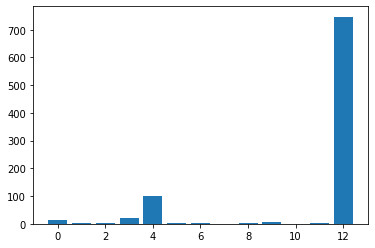

In [13]:
import matplotlib.pyplot as plt
# O shape do X é (178, 13), logo X.shape[1], faz referência ao 13, que é a quantidade de características. Tirando a média de toda a base de dados (X) no eixo 0
plt.bar(list(range(X.shape[1])), np.mean(X, axis=0))
plt.show()
# Perceba uqe há duas características (4 e 12) que se diferencia bastante das demais. Alguns classificadores são sensíveis a esse tipo de característica ou mudança, por exemplo o KNN. Sendo necessário tratar a base (padronizar) antes de submeter a esses classificadores

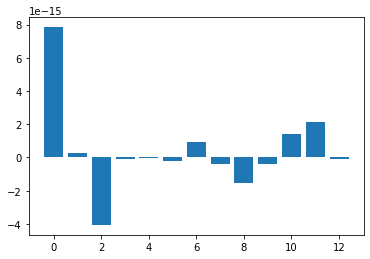

In [20]:
from sklearn.preprocessing import StandardScaler # Função bem comum de padronização

scaler = StandardScaler() # Cria um objeto baseado no StandadScaler
X_new = scaler.fit_transform(X) # Cria um X padronizado chamado X_new

import matplotlib.pyplot as plt
plt.bar(list(range(X_new.shape[1])), np.mean(X_new, axis=0)) # Plota um gráfico com o novo X padronizado (X_new)
plt.show()

In [15]:
from sklearn.model_selection import cross_validate # Será utilizado o cross_validate para fazer a comparação antes de padronizar e depois de padronizado
from sklearn.linear_model import LogisticRegression #Classificador
import numpy as np

modelo = LogisticRegression()
scores = cross_validate(modelo, X, y) # A validação cruzada recebe o objeto de LogisticRegression, todas as características da base e os targets
sempad = np.mean(scores['test_score']) # Sempad -> Sem padronização. Faz a média ("np.mean") dos valores da base de teste ("scores['test_score']")
print(f"Sem padronização: {sempad}")

Sem padronização: 0.9555555555555555


In [21]:
scores = cross_validate(modelo, X_new, y) # Fazendo o mesmo do anteior, porém agora utilizando o X padronizado (X_new)
compad = np.mean(scores['test_score'])
print(f"Com padronização: {compad}")

Com padronização: 0.9831746031746033


In [17]:
from sklearn.pipeline import Pipeline # Incluindo o pipeline

modelo = Pipeline([ # Pipeline seria uma sequência de tarefas a serem feitas?
    ("padronização", scaler),
    ("knn", LogisticRegression())
])
scores = cross_validate(modelo, X_new, y)
aninha = np.mean(scores['test_score'])
print(f"Com padronização aninhada: {aninha}")

Com padronização aninhada: 0.9831746031746033


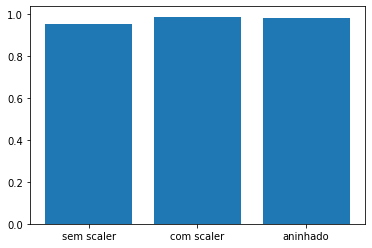

In [18]:

import matplotlib.pyplot as plt
colunas = ['sem scaler', 'com scaler', 'aninhado'] # O nome é aninhado pois é uma validação dentro de outra
plt.bar(colunas, [sempad, compad, aninha])
plt.show()

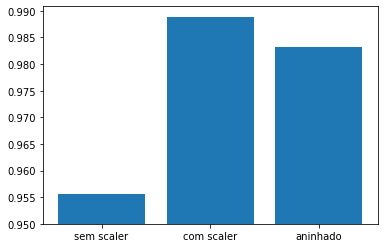

In [19]:
# Isso é uma gambiarra que fazem para mostrar a mesma coisa do gráfico anterior, porém dando mais ênfase na difereça entre as barras.
import matplotlib.pyplot as plt
plt.bar(colunas, np.array([sempad, compad, aninha])-0.95, bottom=0.95) # Plota um grafico a partir de 0.95, só para visualizar o que interessa mesmo
plt.show()

# Apesar do aninhado ser um pouco pior que o com scaler, ele ainda é melhor por se aproximar mais da realidade
# Os ajuste e escolher os hiperparâmetros deve ser feito também dentro do pipeline